<a href="https://colab.research.google.com/github/BALaka-18/Statistics_Assignment/blob/master/Copy_of_Statistics_assignment_1.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [0]:
# Write your code in jupyter notebook and upload it to github and share the link for submission

In [2]:
from scipy import stats
import numpy as np
import pandas as pd
from google.colab import drive

drive.mount('/content/gdrive')

Go to this URL in a browser: https://accounts.google.com/o/oauth2/auth?client_id=947318989803-6bn6qk8qdgf4n4g3pfee6491hc0brc4i.apps.googleusercontent.com&redirect_uri=urn%3aietf%3awg%3aoauth%3a2.0%3aoob&response_type=code&scope=email%20https%3a%2f%2fwww.googleapis.com%2fauth%2fdocs.test%20https%3a%2f%2fwww.googleapis.com%2fauth%2fdrive%20https%3a%2f%2fwww.googleapis.com%2fauth%2fdrive.photos.readonly%20https%3a%2f%2fwww.googleapis.com%2fauth%2fpeopleapi.readonly

Enter your authorization code:
··········
Mounted at /content/gdrive


In [0]:
matches = pd.read_csv('/content/gdrive/My Drive/matches.csv')
dlv = pd.read_csv('/content/gdrive/My Drive/deliveries.csv')

In [4]:
matches.head()

,id,season,city,date,team1,team2,toss_winner,toss_decision,result,dl_applied,winner,win_by_runs,win_by_wickets,player_of_match,venue,umpire1,umpire2,umpire3
0,1,2017,Hyderabad,2017-04-05,Sunrisers Hyderabad,Royal Challengers Bangalore,Royal Challengers Bangalore,field,normal,0,Sunrisers Hyderabad,35,0,Yuvraj Singh,"Rajiv Gandhi International Stadium, Uppal",AY Dandekar,NJ Llong,NaN
1,2,2017,Pune,2017-04-06,Mumbai Indians,Rising Pune Supergiant,Rising Pune Supergiant,field,normal,0,Rising Pune Supergiant,0,7,SPD Smith,Maharashtra Cricket Association Stadium,A Nand Kishore,S Ravi,NaN
2,3,2017,Rajkot,2017-04-07,Gujarat Lions,Kolkata Knight Riders,Kolkata Knight Riders,field,normal,0,Kolkata Knight Riders,0,10,CA Lynn,Saurashtra Cricket Association Stadium,Nitin Menon,CK Nandan,NaN
3,4,2017,Indore,2017-04-08,Rising Pune Supergiant,Kings XI Punjab,Kings XI Punjab,field,normal,0,Kings XI Punjab,0,6,GJ Maxwell,Holkar Cricket Stadium,AK Chaudhary,C Shamshuddin,NaN
4,5,2017,Bangalore,2017-04-08,Royal Challengers Bangalore,Delhi Daredevils,Royal Challengers Bangalore,bat,normal,0,Royal Challengers Bangalore,15,0,KM Jadhav,M Chinnaswamy Stadium,NaN,NaN,NaN


In [5]:
dlv.head()

,match_id,inning,batting_team,bowling_team,over,ball,batsman,non_striker,bowler,is_super_over,wide_runs,bye_runs,legbye_runs,noball_runs,penalty_runs,batsman_runs,extra_runs,total_runs,player_dismissed,dismissal_kind,fielder
0,1,1,Sunrisers Hyderabad,Royal Challengers Bangalore,1,1,DA Warner,S Dhawan,TS Mills,0,0,0,0,0,0,0,0,0,NaN,NaN,NaN
1,1,1,Sunrisers Hyderabad,Royal Challengers Bangalore,1,2,DA Warner,S Dhawan,TS Mills,0,0,0,0,0,0,0,0,0,NaN,NaN,NaN
2,1,1,Sunrisers Hyderabad,Royal Challengers Bangalore,1,3,DA Warner,S Dhawan,TS Mills,0,0,0,0,0,0,4,0,4,NaN,NaN,NaN
3,1,1,Sunrisers Hyderabad,Royal Challengers Bangalore,1,4,DA Warner,S Dhawan,TS Mills,0,0,0,0,0,0,0,0,0,NaN,NaN,NaN
4,1,1,Sunrisers Hyderabad,Royal Challengers Bangalore,1,5,DA Warner,S Dhawan,TS Mills,0,2,0,0,0,0,0,2,2,NaN,NaN,NaN


**Question 1.** 

You have to create a function that receives a list of numbers like [23,14,13,56,78,98,12] and returns it's Interquartile range(IQR)

Note: You have to code the logic from scratch

In [35]:
def iqr(d):
  data = sorted(d)
  # Second Quartile = Median
  Q2 = np.median(data)
  ind = len(data)//2

  # First and Third Quartiles
  if len(data)%2==0:
    Q1 = np.median(data[:ind])
    Q3 = np.median(data[ind:])
  elif len(data)%2!=0:
    Q1 = np.median(data[:ind])
    Q3 = np.median(data[ind+1:])

  return Q3-Q1

# Test
iqr([23,14,13,56,78,98,12])

65.0

**Question 2:**

 Plot a histogram for total team scores for all IPL games.

Note: Per match 2 teams will play hence total number scores would be = no. of matches * 2

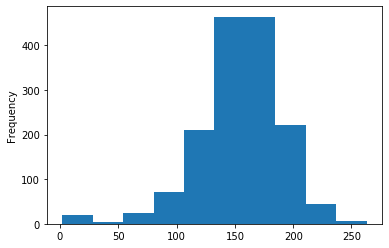

In [17]:
scores = dlv.groupby(['match_id', 'inning','batting_team','bowling_team'])['total_runs'].sum().reset_index()
scores['total_runs'].plot(kind='hist')

**Question 3.**

 Find the skewness of bowler economy data where the bowler has bowled a minimum of 300 balls.

Note : if you don't know about economy read this https://en.wikipedia.org/wiki/Economy_rate_(cricket)

In [13]:
new = dlv['bowler'].value_counts()
bowler_list = new[new > 300].index.tolist()
# print(bowler_list)
# len(bowler_list)
final = dlv[dlv['bowler'].isin(bowler_list)]
new2 = final.drop_duplicates(subset=['over','match_id'],keep='first')
overs = new2['bowler'].value_counts()
balls = final['bowler'].value_counts()
economy = (final['total_runs'].count())/overs
economy.sort_values().values
print('\nSkewness of bowler economy data = ',stats.skew(economy)) 


Skewness of bowler economy data =  0.8251850050026631


**Question 4:**

Give three examples of negatively skewed data and 3 examples of positively skewed data

**THREE EXAMPLES OF POSITIVELY SKEWED DATA :**

1. The marks obtained by students in a difficult exam (Very few get high scores)
2. The income of an average adult in India (very few, maybe 5-7% of the entire population earn > 50 lacs per annum)
3. The distribution of the daily stock market returns. (Truely, up days are a phenomenon)

**THREE EXAMPLES OF NEGATIVELY SKEWED DATA :**

1. The CGPA obtained by students when they graduate. (Very few pass with very low CGPA)
2. The marks obtained by students in an easy exam (very few do poorly in easy exams)
3. Age of death from natural causes (most people die of old age)